
Welcome to the Model Training Workbook. As usual, let's start with importing the libraries we will need.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

On Wednesday, we have worked with the house_df and learnt how to best clean a data set. We will continue with the cleaned data set from Monday. Let's start by reading it into a dataframe.

In [2]:
house_df = pd.read_csv('cleaned_house_df.csv')

Of course, how clean the data set is we still need to check it.

In [3]:
house_df.shape

(1863, 30)

In [4]:
house_df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age
count,1863.000000,1863.000000,1863.000000,1863.000000,1863.00000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000
mean,423010.393451,3.409018,2.564144,2299.173913,1982.71927,12522.044552,0.879227,40.352657,4.515835,5.100913,5.348900,40.945786,3.406871,23.464305,15.896404,38.604402,69.070853,65.047236,461.369834,138.816425,6.495706,2.791734,2007.116479,0.039184,0.031133,17.982823,24.397209
std,151764.257544,1.065101,0.928741,1298.029915,20.21804,35040.992371,0.325951,47.038157,4.501180,8.500743,7.566931,53.717473,4.705711,25.837376,17.724606,6.643582,19.679230,16.904131,222.484352,70.250523,1.992058,0.507300,5.205638,0.194085,0.173723,6.465535,21.087996
min,200000.000000,1.000000,1.000000,500.000000,1880.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000,0.000000,0.000000,3.000000,0.000000
25%,300000.000000,3.000000,2.000000,1342.500000,1969.00000,1540.000000,1.000000,7.000000,1.000000,0.000000,0.000000,6.500000,0.000000,4.000000,4.500000,33.000000,58.000000,53.000000,319.000000,94.000000,5.000000,3.000000,2004.000000,0.000000,0.000000,12.000000,6.000000
50%,392000.000000,3.000000,3.000000,1900.000000,1986.00000,5846.000000,1.000000,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,423.000000,124.000000,7.000000,3.000000,2007.000000,0.000000,0.000000,18.000000,21.000000
75%,525000.000000,4.000000,3.000000,2951.000000,2000.00000,11325.000000,1.000000,58.000000,7.000000,6.000000,6.500000,51.000000,5.000000,35.500000,21.000000,43.000000,84.000000,78.000000,564.000000,168.000000,8.000000,3.000000,2011.000000,0.000000,0.000000,24.000000,38.000000
max,800000.000000,5.000000,6.000000,7842.000000,2014.00000,436471.000000,1.000000,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000,1.000000,1.000000,30.000000,114.000000


In [5]:
house_df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1863,1863,1863
unique,2,8,5
top,Single-Family,Brick,Composition Shingle
freq,1061,682,1201


We still have come categorical values we need to take care of. Let's use the "get_dummies".

In [6]:
base_df = pd.get_dummies(house_df, columns=["exterior_walls"])

In [7]:
base_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0,0,0,0,0,0,0,0,1
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41,1,0,0,0,0,0,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49,0,0,0,0,0,0,0,1
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5,0,0,0,0,0,0,0,1
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10,1,0,0,0,0,0,0,0


In [8]:
base_df = pd.get_dummies(base_df, columns=["roof"])

In [9]:
base_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
base_df = pd.get_dummies(base_df, columns=["property_type"])

In general, we wouldn't want to make our data set bigger, that's why encoders might be more preferable in largeapplications.

In [11]:
base_df.shape

(1863, 42)

In [12]:
base_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Model Training
Now let's proceed as we would for a basic ML application. We would pick out target and input features, split, and scale the data set, right?

In [13]:
# Create separate object for target variable
y = base_df.tx_price

# Create separate object for input features
X = base_df.drop('tx_price', axis=1)

Let's import the libraries we use in this step.

In [14]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# For standardization
from sklearn.preprocessing import StandardScaler

# Import Regularized Regression algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algorithms
from sklearn.ensemble import RandomForestRegressor

And let's split the data set.

In [15]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [16]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


In [17]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,1982.769799,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,3.361745,22.909396,15.770470,38.508725,69.471141,65.012752,464.265772,139.610067,6.510067,2.779195,2007.113423,0.036913,0.033557,17.940268,24.343624,0.359732,0.024161,0.059060,0.065772,0.119463,0.037584,0.268456,0.065772,0.073154,0.643624,0.189262,0.060403,0.033557,0.419463,0.580537
std,1.072914,0.930476,1297.101677,20.397067,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,4.693709,25.724463,17.999282,6.615223,19.865080,17.092542,227.249819,71.510905,1.975224,0.517235,5.233810,0.188611,0.180146,6.452059,21.209025,0.480083,0.153601,0.235817,0.247966,0.324442,0.190252,0.443305,0.247966,0.260477,0.479089,0.391848,0.238311,0.180146,0.493637,0.493637
min,1.000000,1.000000,500.000000,1880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1969.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,59.000000,53.250000,321.000000,94.000000,5.000000,3.000000,2004.000000,0.000000,0.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,1986.000000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,2.000000,15.000000,10.000000,38.000000,74.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000,0.000000,0.000000,18.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,2000.000000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,572.000000,169.000000,8.000000,3.000000,2011.000000,0.000000,0.000000,24.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,2014.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000,1.000000,1.000000,30.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Normally, we would create a scaler object, fit the X_train values and then transform X_train and X_test.

In [18]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### 1. Building Pipelines
Let's see how building pipelines can help us.

In [19]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

Let's put both the Scaler and the Regressor in the same pipeline. This makes things easy and tidy.

In [20]:
# Pipeline with Standardization and Lasso Regression
make_pipeline(StandardScaler(), Lasso(random_state=123))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=123))])

We can also build multiple pipelines using a dictionary.

In [21]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123))
}

In [22]:
# Add a pipeline for Elastic-Net
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))

Let's see how the pipeline information is stored.

In [23]:
pipelines['lasso']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=123))])

In [24]:
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

### 2. Parameter Selection
Another thing we have been exploring "manually" so far had been the hyperparameters. Let's create hyperparameter dictionaries for our pipelines.

In [25]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

In [26]:

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

We can also bundle all these hyperparameters together.

In [27]:
# Create hyperparameters dictionary
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

### 3. Grid Search CV
Now we are ready to search the parameter grid for the best parameters for our model.

In [28]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

Simple as this, we are passing our pipeline which contained the StandardScaler and Lasso as well as various hyperparametrs with varying alpha. 

In [29]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters

model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

Be careful, our model is not created yet we just readied pipelines and grid. 

In [30]:
model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

### 4. Grid searching in the parameter space
It is time to see the grid searching magic. We can start by fitting the training set.

In [31]:
# Fit and tune model
model.fit(X_train, y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413587588668.7754, tolerance: 3524131393.553651
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

We can immediately extract information from the fitted model. 

In [32]:
model.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=123))])

In [33]:
model.best_params_

{'lasso__alpha': 10}

In [34]:
model.cv_results_

{'mean_fit_time': array([0.07645338, 0.08958132, 0.08995626, 0.08934314, 0.07979269,
        0.08252068, 0.08427663, 0.08343053, 0.06521955]),
 'std_fit_time': array([0.00683389, 0.00693331, 0.00503424, 0.00439049, 0.00345979,
        0.00372332, 0.00571279, 0.00474579, 0.0063996 ]),
 'mean_score_time': array([0.00528734, 0.00539167, 0.00528095, 0.00442379, 0.00486054,
        0.00520043, 0.00502737, 0.00433352, 0.00286446]),
 'std_score_time': array([0.00116383, 0.00032908, 0.00120222, 0.00048596, 0.00070087,
        0.00076198, 0.00145575, 0.00105666, 0.00051805]),
 'param_lasso__alpha': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'lasso__alpha': 0.001},
  {'lasso__alpha': 0.005},
  {'lasso__alpha': 0.01},
  {'lasso__alpha': 0.05},
  {'lasso__alpha': 0.1},
  {'lasso__alpha': 0.5},
  {'lasso__alph

In [35]:
model.param_grid

{'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

### 5. Grid searching in the pipelines
Okay, now that is an ambitious title. Let's leverage what we have learnt so far and bring it all together.

In [36]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413587588668.7754, tolerance: 3524131393.553651
  model = cd_fast.enet_coordinate_descent(


lasso has been fitted.
ridge has been fitted.
enet has been fitted.


We can print out what is the best score for each model.

In [37]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.4064592696661304
ridge 0.41314192762972424
enet 0.43435577461816843


We can also print out what is the best parameters for each model.

In [38]:
for name, model in fitted_models.items():
    print( name, model.best_params_ )

lasso {'lasso__alpha': 10}
ridge {'ridge__alpha': 10}
enet {'elasticnet__alpha': 0.5, 'elasticnet__l1_ratio': 0.5}


We can use this approach for ensembling modeling too.

In [39]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),
                                RandomForestRegressor(random_state=123))

For random forests, we can add 

In [40]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    #'randomforestregressor__min_samples_leaf': [10, 5, 3], #use one only
    'randomforestregressor__max_depth': [5, 10, 20] #use one only
}

In [41]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [42]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413587588668.7754, tolerance: 3524131393.553651
  model = cd_fast.enet_coordinate_descent(


lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


Random forest fitting took a lot of time. Do you want to guess how many combinations it is going through?

In [43]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.4064592696661304
ridge 0.41314192762972424
enet 0.43435577461816843
rf 0.8198960755425168


In [44]:
for name, model in fitted_models.items():
    print( name, model.best_params_)

lasso {'lasso__alpha': 10}
ridge {'ridge__alpha': 10}
enet {'elasticnet__alpha': 0.5, 'elasticnet__l1_ratio': 0.5}
rf {'randomforestregressor__max_depth': 20, 'randomforestregressor__n_estimators': 200}


Let's check out how our preditctions look like.

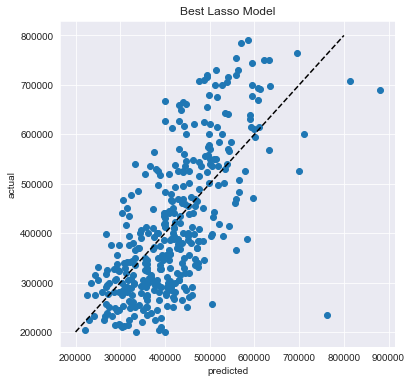

In [45]:
fig = plt.figure(figsize=[6,6])
lasso_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(lasso_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Best Lasso Model')
plt.plot([200000,800000], [200000,800000], 'k--')
plt.show()

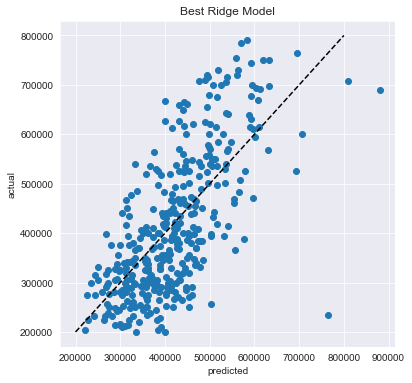

In [46]:
fig = plt.figure(figsize=[6,6])
ridge_pred = fitted_models['ridge'].predict(X_test)
plt.scatter(ridge_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Best Ridge Model')
plt.plot([200000,800000], [200000,800000], 'k--')
plt.show()

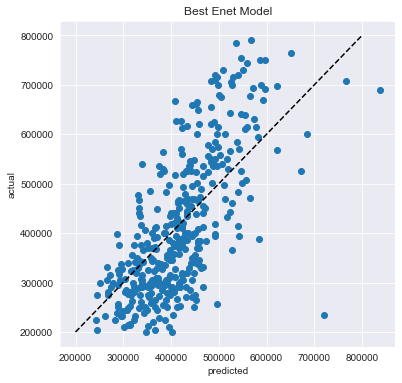

In [47]:
fig = plt.figure(figsize=[6,6])
enet_pred = fitted_models['enet'].predict(X_test)
plt.scatter(enet_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Best Enet Model')
plt.plot([200000,800000], [200000,800000], 'k--')
plt.show()

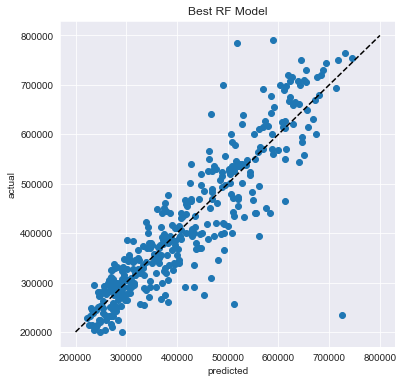

In [48]:
fig = plt.figure(figsize=[6,6])
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Best RF Model')
plt.plot([200000,800000], [200000,800000], 'k--')
plt.show()

In [49]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200,
                                       random_state=123))])

### 5. Save your best model

In [50]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

👏 Congratulations, you have completed the Model Training Workbook!